# Electric Motor Temperature Estimation

**Link**

https://www.kaggle.com/wkirgsn/electric-motor-temperature


**Context**

The data set comprises several sensor data collected from a permanent magnet synchronous motor (PMSM) deployed on a test bench. The PMSM represents a german OEM's prototype model. Test bench measurements were collected by the LEA department at Paderborn University. This data set is mildly anonymized.

**Content**

All recordings are sampled at 2 Hz. The data set consists of multiple measurement sessions, which can be distinguished from each other by column `profile_id`. A measurement session can be between one and six hours long.

The motor is excited by hand-designed driving cycles denoting a reference motor speed and a reference torque. Currents in d/q-coordinates (columns `i_d` and `i_q`) and voltages in d/q-coordinates (columns `u_d` and `u_q`) are a result of a standard control strategy trying to follow the reference speed and torque. Columns `motor_speed` and `torque` are the resulting quantities achieved by that strategy, derived from set currents and voltages.

Most driving cycles denote random walks in the speed-torque-plane in order to imitate real world driving cycles to a more accurate degree than constant excitations and ramp-ups and -downs would.

The dataset contains following attributes:
- u_q - Voltage q-component measurement in dq-coordinates (in V)
- coolant - Coolant temperature (in °C)
- stator_winding - Stator winding temperature (in °C) measured with thermocouples
- u_d - Voltage d-component measurement in dq-coordinates
- stator_tooth - Stator tooth temperature (in °C) measured with thermocouples
- motor_speed - Motor speed (in rpm)
- i_d - Current d-component measurement in dq-coordinates
- i_q - Current q-component measurement in dq-coordinates
- pm - Permanent magnet temperature (in °C) measured with thermocouples 
- stator_yoke - Stator yoke temperature (in °C) measured with thermocouples
- ambient - Ambient temperature (in °C)
- torque - Motor torque (in Nm)
- profile_id - Measurement session id. Each distinct measurement session can be identified through this integer id.

The `pm` attribute is our target variable, which should be predicted depending on new measurements.

**Task (Regression)**

Your task is to use the present data set to predict the temperature of the motors permament magnet. To do this, use the `Decision Tree` and `ANN` methods for this task. You must also include a third method that you have selected yourself.

First of all, get an overview of the project in your group. Then carefully read the checklist for machine learning projects and think about how you want to organize your group work. It is strongly recommended that all task items are completed by all group members. You can divide the focus among yourself, but make sure that all members are as well informed as possible about the content.

Use the checklist for machine learning projects as a guide when working on the task. Document all the individual steps that are listed there (main and sub-items). Make sure to use Markdown Cells for your documentation. Document the functionality of your algorithms (all three) with equations and explanations. Dont forget, this project is a task for five students. We expect a detailed documentation of your approach and your results.

**Note**

We are aware that there are examples and solutions for the selected data sets on popular platforms, e.g. Kaggle. You are welcome to use them as a guide. But remember that at the end of the project, your own work will be assessed. We compare the results with the popular solutions of common platforms. We would like to recognize the independence in your work and see a difference to the existing solution approaches.

* **Frame the Problem and Look at the Big Picture:**

    1. **Define the objective of your project in your own words.** <br>
    Machine Learning should be used to estimate the magnet temperature of an electric car motor. Therefore 3 machine learning regression algorythms must be used.<br><br>
    2. **Select a performance criteria for evaluation of the task.** <br>
    Root Mean Square Error (RMSE)<br>
    Mean Squared Error (MSE)<br>
    Mean Absolute Error (MAE)<br>
    Coefficient of determination (R2)<br><br>
    3. **Explain in a paragraph how you would solve the problem manually.** <br>
    First determine the relevant Parameters, then perform a classic regression<br><br>
    4. **List assumptions that you made so far.** <br>
    A precise prediction of the exact temperature, including several comma values, is important and it has to be values instead of areas (such as low, medium, hot temperatures or similar). Thus, regression methods are to be used and this is not a classification task. We want the predict the exact tempreture, not a section where it is too hot<br><br><br><br>

* **Get the Data:**
    1. Create a new workspace for the course project. 
    2. Discuss with your colleagues whether you would like to use a version management tool.
        - git: https://git-scm.com/
        - github: https://github.com/
        - github tutorial: https://guides.github.com/activities/hello-world/
    3. Get the data.
    4. Convert the data to a format you can easily manipulate (if required).
    5. Check the size and type of the data.
    6. Sample a test set, put it aside, and never look at it (no data snooping!).
    7. Sample a training set and a validation set.
    <br><br> We are importing several important packages such as pandas in order to use machine learning techniques.<br>
    Later we load the data from the excel-file ("measures_v2.csv"), as found on kaggle.com for this task. We create the name "db" for the copy of the loaded database.

In [1]:
# import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# load the data
database = pd.read_csv('measures_v2.csv',sep = ',')

# a copy is created
db = database.copy()

The info() function lets us understand our dataset: we have 1,33 million entries, and except for the profile-id of the measurements, which is stored as integers, we have the float data type.

In [2]:
# size and type of data
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB


We are creating a test set, consisting of 10% of the original dataset. This is enough since we have a dataset of over one million entries. We use the train_test_split in order to create a test split that is reproducable upon every run of the program. We use the random_state of 11 and receive a test set of 133 thousand entries and the rest of the data, nearly 1,2 million entries, get stored in the rest_set.<br><br>

In [3]:
# Creation of the Testset
from sklearn.model_selection import train_test_split

rest_set, test_set = train_test_split(db, test_size=0.1, random_state=11)

print("Lenght of test set: " + str(len(test_set)))
print("Lenght of rest set: " + str(len(rest_set)))

Lenght of test set: 133082
Lenght of rest set: 1197734


Making sure we got an actual, randomized (but reproducable) test_ and rest_set by using the head() function.

In [4]:
test_set.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
722369,130.618692,29.050824,61.439510,0.002221,52.941690,3553.990284,-46.615213,-1.604462,59.373981,43.563195,26.384410,-2.169952,53
1280896,68.190920,49.863316,78.749380,-112.427244,68.909741,2567.191703,-108.862588,136.358895,66.631247,59.875995,27.177060,116.708366,58
668531,17.199327,40.748283,97.473761,-129.257835,75.236424,4999.961953,-205.664365,76.189573,73.635881,57.333054,23.154760,75.000000,41
2358,87.597618,19.468315,71.651123,-96.182190,56.600018,4999.952148,-138.393463,53.406368,63.024918,39.537643,23.174236,48.502354,17
1242057,22.233465,87.194638,122.463910,-128.911239,104.791174,4264.252190,-195.114427,90.687950,90.172948,95.318739,26.383176,90.518617,79


In [5]:
rest_set.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
400298,8.151685,18.437384,64.011566,-7.612288,45.986176,99.964218,-79.939240,188.412292,37.691719,37.013691,22.591074,155.077316,18
325340,46.205223,18.772440,28.150265,-15.377940,26.573431,951.265442,-7.817497,43.902065,46.255211,24.324396,23.070459,31.138876,10
672550,89.541055,65.494090,76.174519,-49.249027,72.121730,1999.986862,-15.493590,70.795438,72.817454,69.450865,24.797813,50.000000,41
223357,72.446983,18.838314,72.819138,-106.641556,55.778599,5749.950195,-163.337921,51.757366,52.356743,38.467037,21.689573,48.752762,27
844675,46.651256,47.872370,78.712905,8.423395,68.903914,1046.608792,-5.822269,-9.225458,68.175833,58.731806,26.213013,-7.832992,70


The same steps with the same logic are being used for creating a training as well as a validation set, consisting only of the rest_set. This is done so we do not participate in data snooping, so the test_set remains untouched for later. Here, 10% as a factor for creating the validation set also seems enough for creating and we get about 120 thousand entries for the validation set and a little less than 1,1 million entries for the training set.<br><br>

In [6]:
# Creation of Sample and training set

from sklearn.model_selection import train_test_split

train_set, val_set = train_test_split(rest_set, test_size=0.1, random_state=22)

print("Lenght of train set: " + str(len(train_set)))
print("Lenght of val set: " + str(len(val_set)))

Lenght of train set: 1077960
Lenght of val set: 119774


Once again making sure we got an actual, randomized (but reproducable) train_ and val_set by using the head() function.

In [7]:
train_set.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
268946,131.798004,18.662558,32.868351,-3.034433,32.434135,3499.968506,-46.142372,1.170881,42.330231,27.604677,23.233196,-5.506984e-01,26
176821,7.660975,18.284367,38.949753,-5.408100,31.342405,99.980026,-43.511356,132.618301,28.794954,26.382999,22.200279,1.035654e+02,3
364006,12.091551,18.609158,19.720566,0.825880,19.081577,249.982758,-1.999879,1.098467,24.170731,18.982836,22.872232,1.068078e-01,13
1191570,24.076398,27.091372,56.994167,-9.424970,49.657317,485.428316,-9.601425,48.490075,61.517311,41.958759,26.103196,3.353550e+01,67
1107597,0.673186,18.942768,21.463182,-0.432901,19.850620,-0.001626,-2.001062,1.097172,42.184887,19.848892,23.302057,3.705492e-320,43


In [8]:
val_set.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
404741,8.142149,18.448454,63.974323,-7.616867,45.986176,100.007439,-79.940041,188.412231,38.216949,37.032902,23.182297,1.550821e+02,18
169756,7.675543,19.032387,35.922367,-5.385024,28.112301,100.018112,-43.511829,132.617859,25.428232,24.806215,21.661230,1.035793e+02,3
1132486,122.701561,36.414264,63.689708,-27.061372,59.716856,2616.060259,-4.566916,27.932470,66.742526,52.571328,26.040872,1.859646e+01,66
1146078,0.484796,69.301419,68.881660,-0.548846,67.283227,-0.000602,-1.999267,1.098893,76.843503,67.144779,26.384509,-9.562902e-277,66
376994,119.398819,18.974096,63.866467,-51.839420,52.750652,5649.946289,-119.129120,22.683634,64.781738,38.750271,22.451925,1.997573e+01,31


* **Explore the Data:**
    1. Create a copy of the training set for exploration (sample it down to a manageable size if necessary).
    2. (Create a Jupyter Notebook for your data exploration.)
    3. Study each attribute and its characteristics
        - name
        - type
        - % of missing values
        - noisiness
        - usefulness for task
        - type of distribution
        - ...
    4. Identify the target attribute (supervised learning).
    5. Visualize the data.
    6. Study correlations between attributes.
    7. Identify the promising transformations you may want to apply.
    8. Document the results of your exploratory data analysis.

In this section we start looking at the training set for further analysis, as to later understand what regression methods or what model to use for the prediction of the permanent magnet temperature.<br> In order to to so, we will analyze the data set by focussing on the training set. We can see the first 10 entries of the train_set. 

In [9]:
# show examples
train_set.head(10)

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
268946,131.798004,18.662558,32.868351,-3.034433,32.434135,3499.968506,-46.142372,1.170881,42.330231,27.604677,23.233196,-5.506984e-01,26
176821,7.660975,18.284367,38.949753,-5.408100,31.342405,99.980026,-43.511356,132.618301,28.794954,26.382999,22.200279,1.035654e+02,3
364006,12.091551,18.609158,19.720566,0.825880,19.081577,249.982758,-1.999879,1.098467,24.170731,18.982836,22.872232,1.068078e-01,13
1191570,24.076398,27.091372,56.994167,-9.424970,49.657317,485.428316,-9.601425,48.490075,61.517311,41.958759,26.103196,3.353550e+01,67
1107597,0.673186,18.942768,21.463182,-0.432901,19.850620,-0.001626,-2.001062,1.097172,42.184887,19.848892,23.302057,3.705492e-320,43
1299237,124.128924,56.105484,68.091274,43.775792,65.554770,3262.391801,-38.406246,-39.381371,62.757311,61.222820,28.868314,-3.132680e+01,58
1082114,63.893838,54.117795,92.491823,115.225639,82.630779,2544.456566,-94.246472,-150.263809,83.954870,71.433117,27.975262,-1.262093e+02,65
1110441,62.070888,50.046678,80.485228,-113.937786,69.132450,3660.689993,-147.133380,93.735490,61.991074,59.328886,25.415930,8.590038e+01,66
356603,12.189024,18.617973,19.850620,0.899110,19.841887,249.999359,-2.000922,1.094885,29.201654,19.585794,23.170063,1.860641e-01,13
738403,22.923956,39.646821,78.701284,-128.818025,64.213125,3972.297116,-201.933776,98.820492,64.809229,52.828732,26.718707,1.002653e+02,53


By using the describe() function we see the distribution of values in each category of our database.<br><br>

In [10]:
train_set.describe()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
count,1.077960e+06,1.077960e+06,1.077960e+06,1.077960e+06,1.077960e+06,1.077960e+06,1.077960e+06,1.077960e+06,1.077960e+06,1.077960e+06,1.077960e+06,1.077960e+06,1.077960e+06
mean,5.427713e+01,3.623605e+01,6.634329e+01,-2.508142e+01,5.688089e+01,2.202129e+03,-6.869266e+01,3.735219e+01,5.851277e+01,4.819087e+01,2.456516e+01,3.105592e+01,4.079769e+01
std,4.416757e+01,2.179415e+01,2.866754e+01,6.309623e+01,2.295087e+01,1.860189e+03,6.491413e+01,9.216714e+01,1.899792e+01,1.999304e+01,1.929297e+00,7.711733e+01,2.504925e+01
min,-2.529093e+01,1.062375e+01,1.858582e+01,-1.315304e+02,1.813398e+01,-2.755491e+02,-2.780036e+02,-2.934268e+02,2.087856e+01,1.810874e+01,8.783478e+00,-2.464667e+02,2.000000e+00
25%,1.206990e+01,1.869850e+01,4.278924e+01,-7.844882e+01,3.841339e+01,3.153261e+02,-1.153646e+02,1.095855e+00,4.316939e+01,3.199424e+01,2.318492e+01,-1.404855e-01,1.700000e+01
50%,4.894140e+01,2.690158e+01,6.511998e+01,-7.301491e+00,5.602904e+01,1.999977e+03,-5.109428e+01,1.577397e+01,6.028080e+01,4.562482e+01,2.479733e+01,1.085479e+01,4.300000e+01
75%,9.000708e+01,4.985702e+01,8.813571e+01,1.471579e+00,7.559657e+01,3.764931e+03,-2.979675e+00,1.005344e+02,7.200846e+01,6.147104e+01,2.621690e+01,9.135339e+01,6.500000e+01
max,1.330370e+02,1.015985e+02,1.413629e+02,1.314698e+02,1.119464e+02,6.000015e+03,5.189670e-02,3.017079e+02,1.135906e+02,1.011023e+02,3.069054e+01,2.609997e+02,8.100000e+01


The distribution of values within the respective categories is shown better with histograms; here we got the histograms for the training set. However, this does not help us much at first glance, as the distribution of similarly seeming categories like the temperatures of the stator winding, yoke or tooth differ from one another.<br><br>

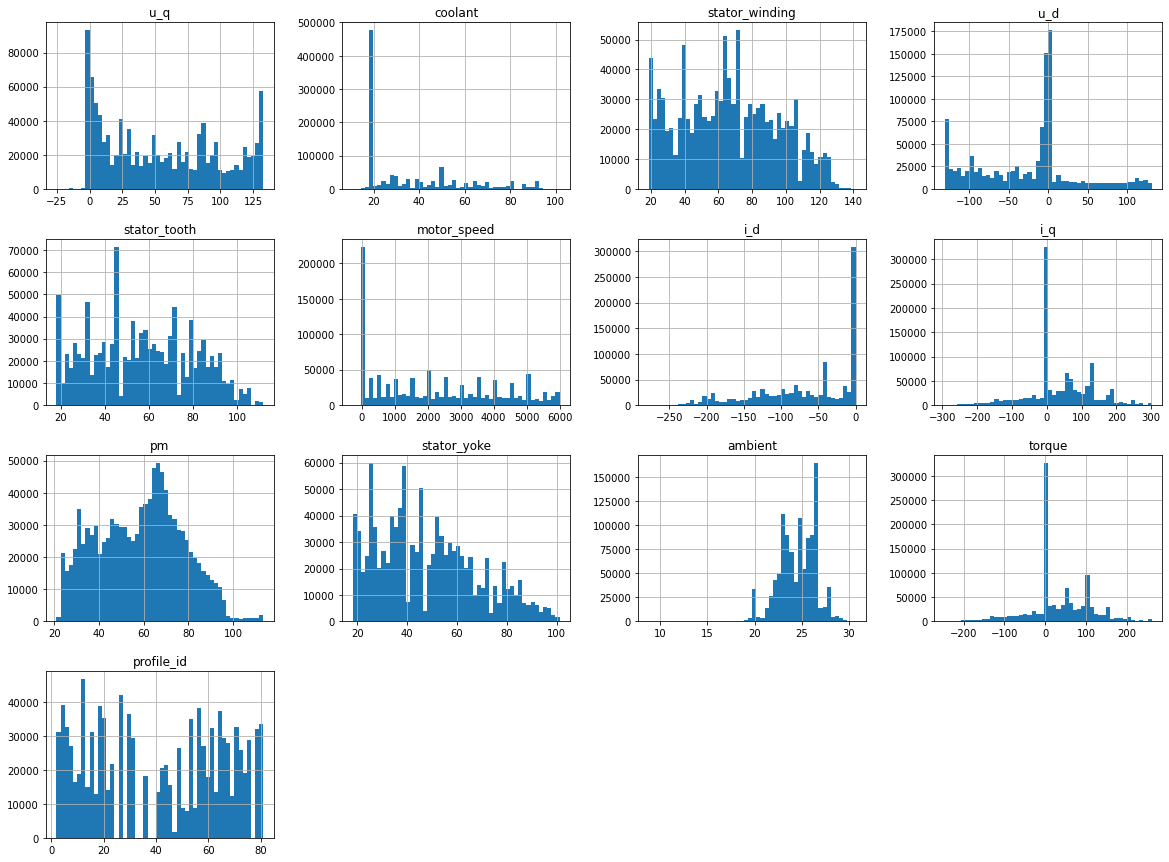

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

train_set.hist(bins=50, figsize=(20,15))
plt.show()

The distribution is shown better in the plotted diagrams below for each category, also in the shape of histograms. As mentioned before, the distribution of the three stator element temperatures do not match one another.<br><br>

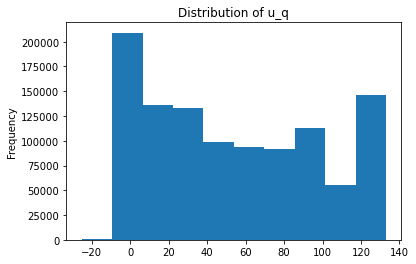

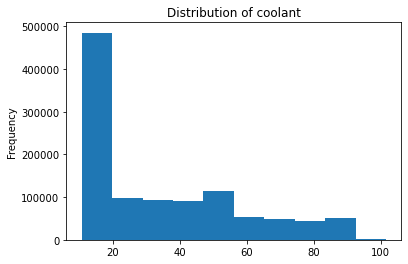

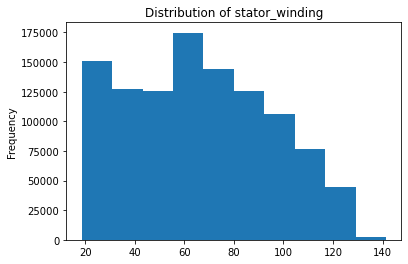

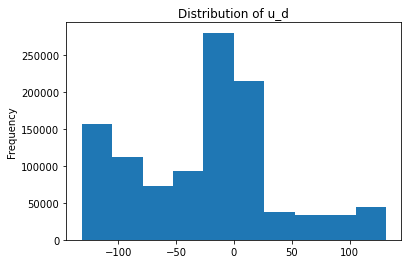

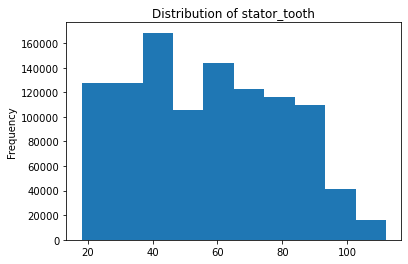

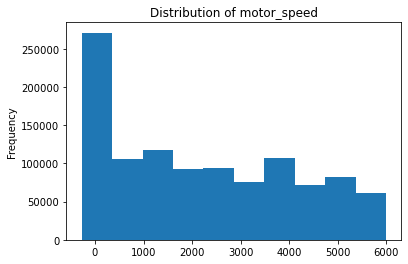

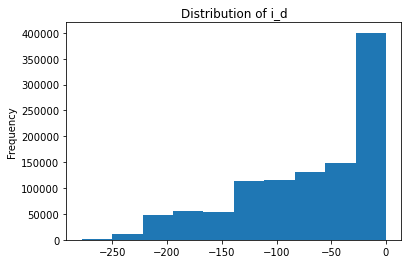

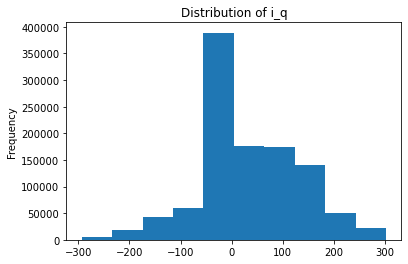

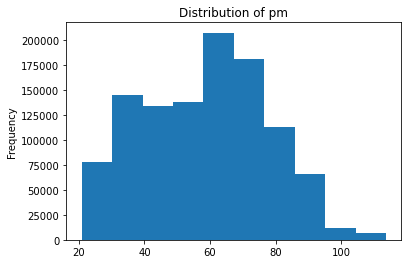

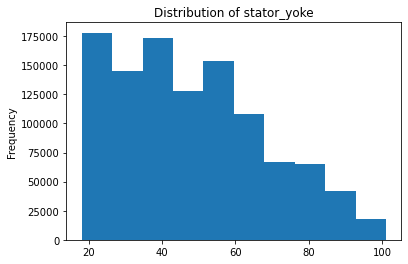

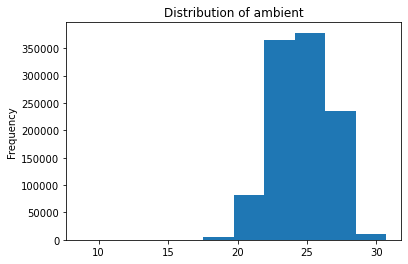

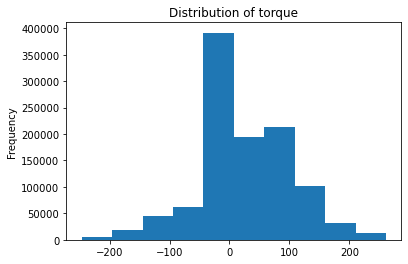

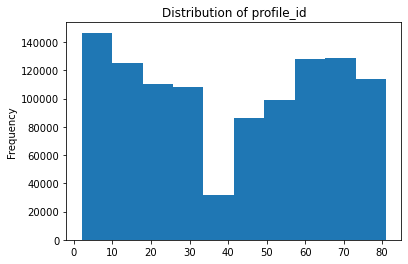

In [12]:
for i in train_set.columns:
    train_set[i].plot(kind='hist')
    plt.title(f'Distribution of {i}')
    plt.show()

The correlation matrix however does show linear correlations above 0,9 for the stator winding and yoke as well as stator tooth. Besides there is an exact correlation of 1 for the electric current i_q and torque. Down below, we list the correlation values of each category compared to the aim category of the permanent magent temperature ("pm"), as numerical values. We can a partially strong correlation of pm and the temperatures of the three stator elements (tooth, yoke, winding).<br><br>

<AxesSubplot:>

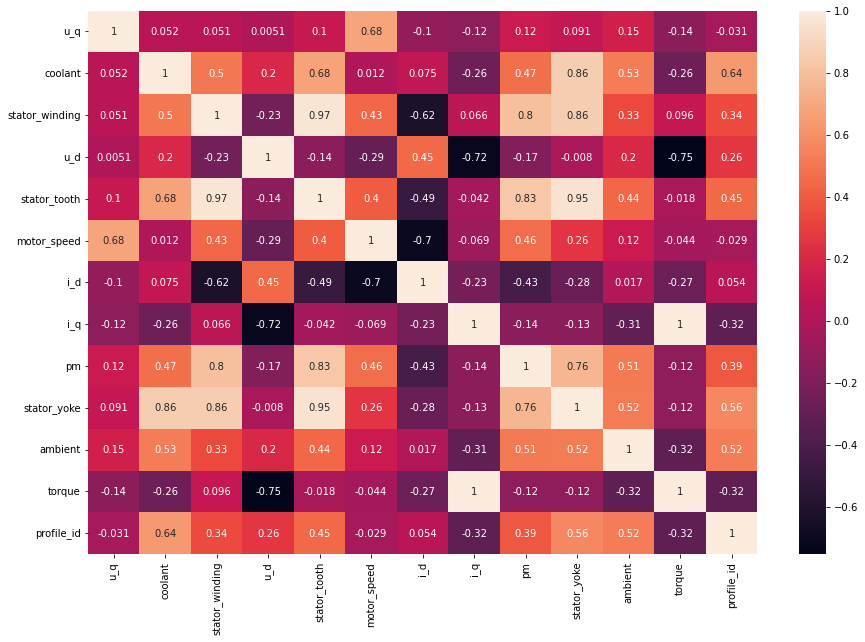

In [13]:
# Correlation on training set or the whole database

corr = train_set.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)


In [14]:
# Correaltion to pm

train_set_corr=train_set.corr()
train_set_corr['pm']

u_q               0.122636
coolant           0.466909
stator_winding    0.795748
u_d              -0.171882
stator_tooth      0.831905
motor_speed       0.459041
i_d              -0.427484
i_q              -0.142775
pm                1.000000
stator_yoke       0.756415
ambient           0.513131
torque           -0.117510
profile_id        0.386173
Name: pm, dtype: float64

Hoping to find out more about the distribution and ranges of each category, a scatter matrix is created for each category. We do this by importing the scatter_matrix method from the pandas.plotting package. We arrange it in 3 columns to 4 rows for better visibility (the 16,20 figsize also have a positive effect on the visibility and those values were found by experimenting). Once again, the data we look at is from the training set (train_set), as we do not want data snooping with the test set. <br><br> All scatter matrix plots are for each respective category in comparison to pm (permanent magnet temperature). <br> The values for ax=axes just place each category either on the left, middle or right of a certain column/row in the output line.<br><br>

<AxesSubplot:xlabel='torque', ylabel='pm'>

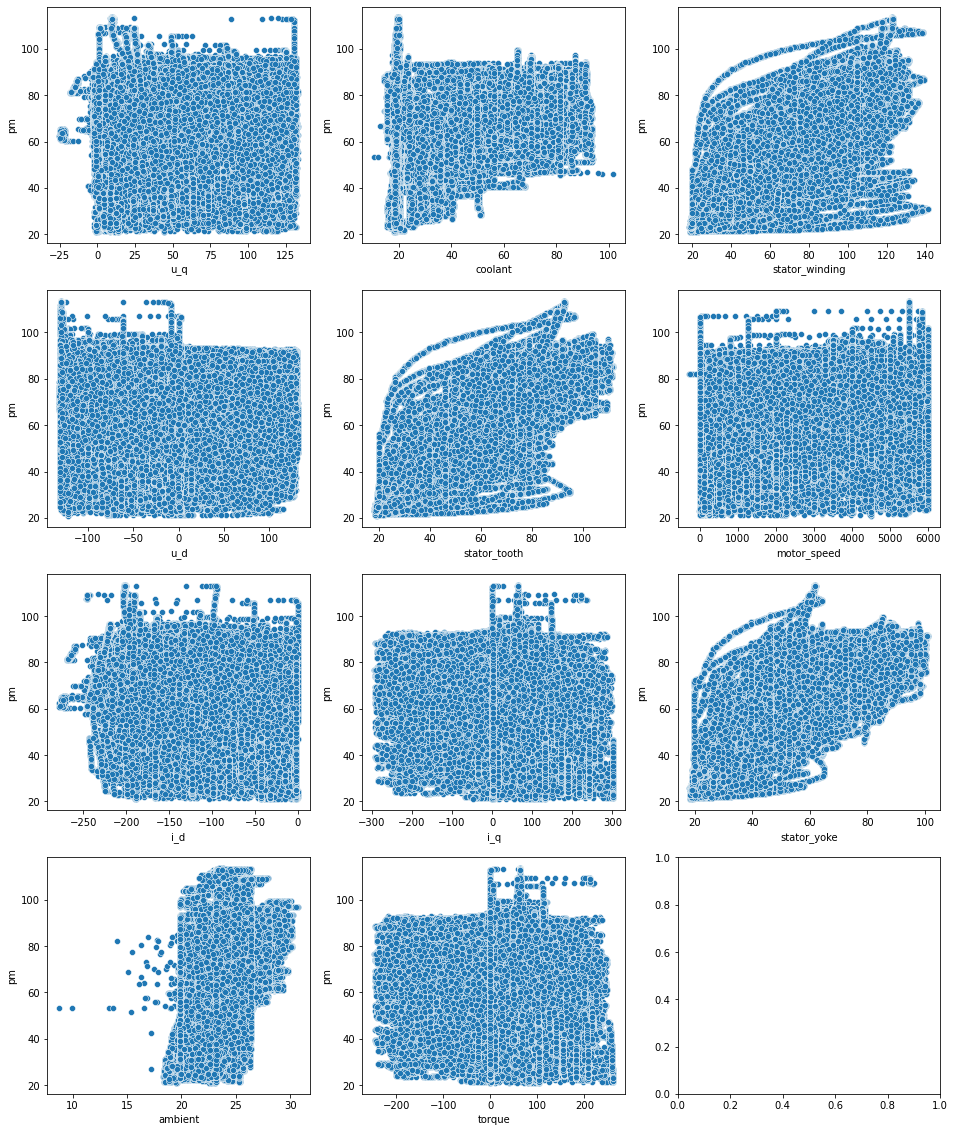

In [15]:
#scatter_matrix for attributes and pm
from pandas.plotting import scatter_matrix

figure,axes = plt.subplots(nrows=4,ncols=3,figsize=(16,20))
sns.scatterplot(data=train_set,x = 'u_q', y = 'pm',ax=axes[0,0])
sns.scatterplot(data=train_set,x = 'coolant', y = 'pm',ax=axes[0,1])
sns.scatterplot(data=train_set,x = 'stator_winding', y = 'pm',ax=axes[0,2])
sns.scatterplot(data=train_set,x = 'u_d', y = 'pm',ax=axes[1,0])
sns.scatterplot(data=train_set,x = 'stator_tooth', y = 'pm',ax=axes[1,1])
sns.scatterplot(data=train_set,x = 'motor_speed', y = 'pm',ax=axes[1,2])
sns.scatterplot(data=train_set,x = 'i_d', y = 'pm',ax=axes[2,0])
sns.scatterplot(data=train_set,x = 'i_q', y = 'pm',ax=axes[2,1])
sns.scatterplot(data=train_set,x = 'stator_yoke', y = 'pm',ax=axes[2,2])
sns.scatterplot(data=train_set,x = 'ambient', y = 'pm',ax=axes[3,0])
sns.scatterplot(data=train_set,x = 'torque', y = 'pm',ax=axes[3,1])


In [16]:
# Transformation
# no transformation performed.

* **Prepare the Data:**
    1. Write functions for all data transformations you apply.
    2. Clean the data.
        - remove outliers<br>
        Die Extremwerte für die Attribute: ambient, torque, i_q, u_d und coolant werden nicht entfernt. Die Ausreißer sehen realistisch aus.
        - fill in missing values<br>

<br> Data transformations are not applied, since the data is already in a matching data type (float). The profile_id is stored as integers, but seems to be unnessecary for the pm prediction and therefore does not require any transformations or so.<br><br>
In order to find possible missing values, the isnull() function as a sum of all categories is used for the train_set. Alternatively, we can also use the isnull() function with a true or false outcome. The function was also carried out for the val_set, but got removed because it has no direct value for the outcome of this task. We can see that there is no data missing. <br><br>

In [31]:
#finding null values in the dataset by using the isnull() function
print(train_set.isnull().sum())

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64


In [18]:
#better option to find isnull
train_set.isnull().values.any()

False

In order to find possible outliers, boxplots of all the categories are created. For that we create another subplot of 4x3 (rows x columns) and position each category within a place on the left, middle or right within that plot. The category "profile_id" is not inspected here since the data there is merely a measurement number for documentation purposes. Once again we only focus on the train_set. <br><br> We can already notice some outliers for the coolant and ambient temperatures as well as for the voltage values of u_d or the current values for i_q and torque. However, upon further inspecting the specific value ranges, we come to the conclusion that these values seem to be realistic and within a range of possible measurements. Therefore, no values will be removed for the further analysis. <br><br>

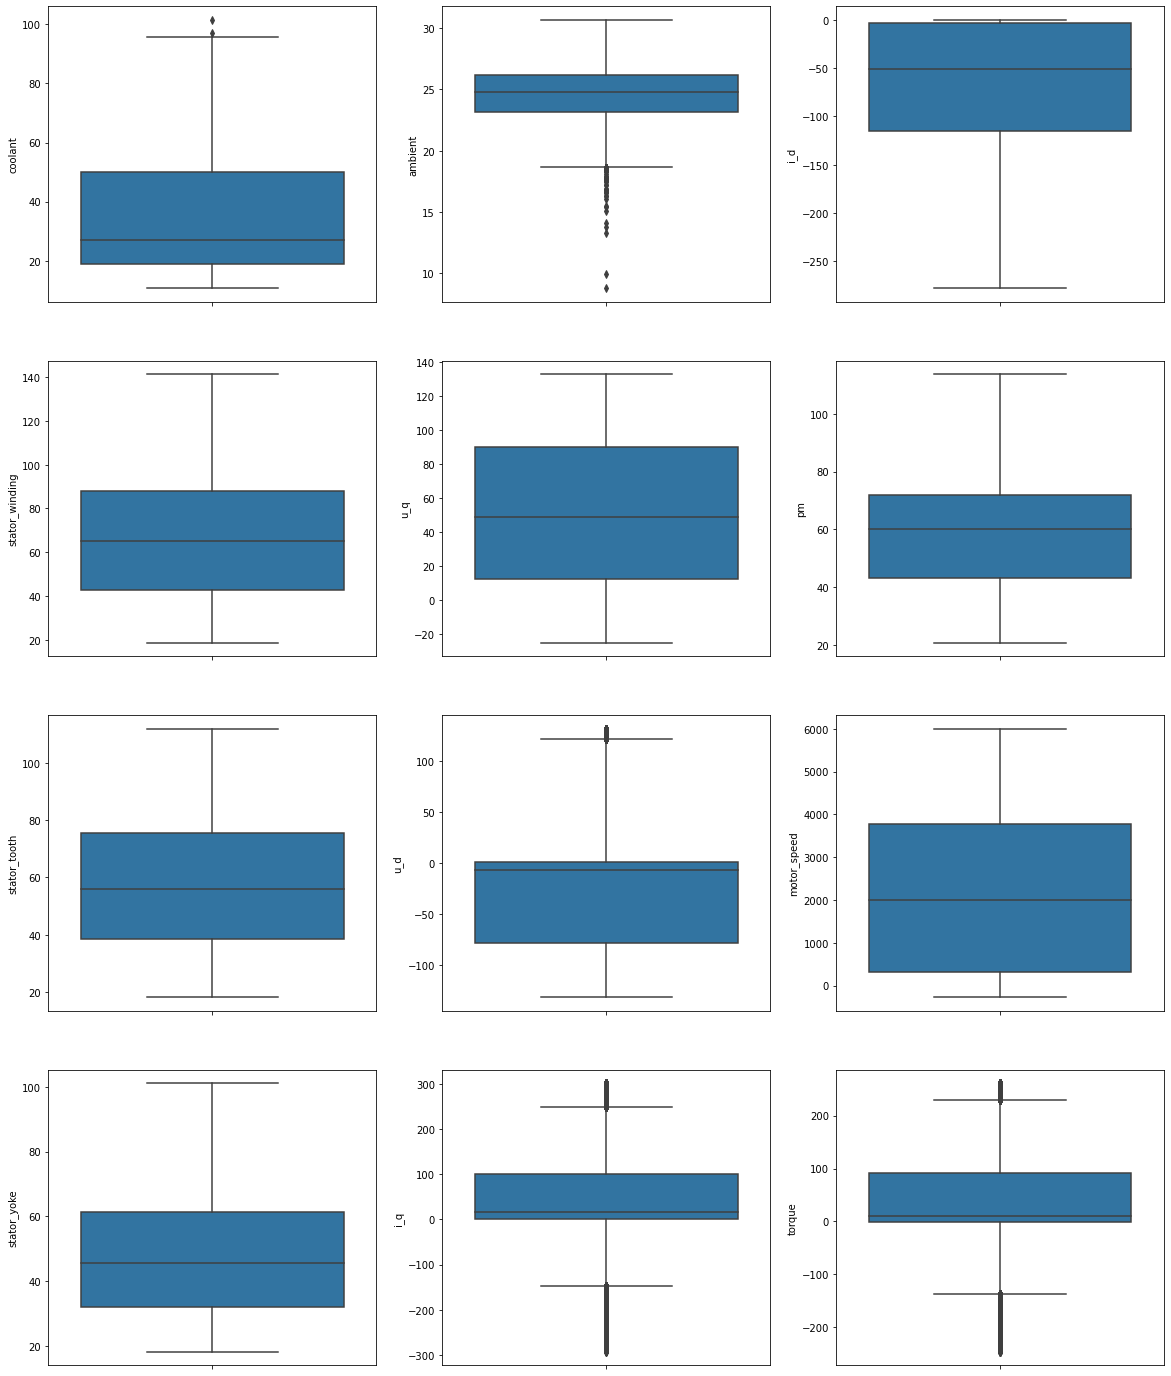

In [38]:
fig, axs = plt.subplots(4, 3, figsize = (20,25))
sns.boxplot(y = 'coolant', data = train_set, ax = axs[0,0]);
sns.boxplot(y = 'stator_winding', data = train_set, ax = axs[1,0]);
sns.boxplot(y = 'stator_tooth', data = train_set, ax = axs[2,0]);
sns.boxplot(y = 'stator_yoke', data = train_set, ax = axs[3,0]);
sns.boxplot(y = 'ambient', data = train_set, ax = axs[0,1]);
sns.boxplot(y = 'u_q', data = train_set, ax = axs[1,1]);
sns.boxplot(y = 'u_d', data = train_set, ax = axs[2,1]);
sns.boxplot(y = 'i_q', data = train_set, ax = axs[3,1]);
sns.boxplot(y = 'i_d', data = train_set, ax = axs[0,2]);
sns.boxplot(y = 'pm', data = train_set, ax = axs[1,2]);
sns.boxplot(y = 'motor_speed', data = train_set, ax = axs[2,2]);
sns.boxplot(y = 'torque', data = train_set, ax = axs[3,2]);

* **Prepare the Data:**
    3. Select important features (drop attributes that provide no useful information for the task).
    profile_id wird gedropt<br>
    4. Use feature engineering.
        - decompose categorical features                
        - add promising transformations for features<br>
    **XXX Keine sinnvolle Transformation gefunden XXX**
        - aggregate features into promissing new features
    5. Use feature scaling (standardize or normalize features).<br>
    **XXX Aufgrund der Ausreißer wird der StandardScaler für die Normalisierung der Daten verwendet. XXX**

In [26]:
from sklearn.preprocessing import StandardScaler  

train_set_y = train_set['pm'].copy()
train_set_x = train_set.drop(['profile_id','pm'], axis=1)
scaler = StandardScaler()
train_set_x_scaled = pd.DataFrame(scaler.fit_transform(train_set_x), columns=train_set_x.columns)
train_set_x_scaled.head()

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,stator_yoke,ambient,torque
0,1.755155,-0.806340,-1.167695,0.349419,-1.065178,0.697692,0.347387,-0.392562,-1.029669,-0.690387,-0.409851
1,-1.055439,-0.823693,-0.955560,0.311799,-1.112746,-1.130073,0.387917,1.033624,-1.090774,-1.225773,0.940249
2,-0.955126,-0.808790,-1.626325,0.410600,-1.646967,-1.049435,1.027400,-0.393348,-1.460911,-0.877483,-0.401325
3,-0.683777,-0.419593,-0.326122,0.248136,-0.314741,-0.922864,0.910299,0.120844,-0.311714,0.797201,0.032153
4,-1.213650,-0.793483,-1.565538,0.390650,-1.613459,-1.183822,1.027382,-0.393362,-1.417593,-0.654695,-0.402710


In [27]:
val_set_y = val_set['pm'].copy()
val_set_x = val_set.drop(['profile_id','pm'], axis=1)
val_set_x_scaled = pd.DataFrame(scaler.transform(val_set_x), columns=val_set_x.columns)
train_set_y.head()

268946     42.330231
176821     28.794954
364006     24.170731
1191570    61.517311
1107597    42.184887
Name: pm, dtype: float64

* **Select and Train your Models:**
    1. Learn the basics about the models you've been assigned.
    2. Select a 3rd model on your own. Use criteria for your selection.
    3. Make a plan for training and evaluation of the models.
    4. Build your models (select meaningful values for the model parameters).
    5. Train your models with the training set.
    6. Measure and compare the performance of your models (use N-fold cross-validation).
    7. Analyze the most significant parameters for each model.
    8. Analyze the types of errors the models make.

In [28]:
# decision tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

model_one = DecisionTreeRegressor(random_state=1)
model_one.fit(train_set_x_scaled, train_set_y)
model_one_y = model_one.predict(val_set_x_scaled)
model_one_mse = mean_squared_error(val_set_y, model_one_y)
print("MSE Model 1: "+str(model_one_mse))
model_one_rmse = np.sqrt(model_one_mse)
print("RMSE Model 1: "+str(model_one_rmse))
model_one_mae = mean_absolute_error(val_set_y, model_one_y)
print("MAE Model 1: "+str(model_one_mae))
model_one_r2 = r2_score(val_set_y, model_one_y)
print("R2 Model 1: "+str(model_one_r2))

In [29]:
# ANN
from sklearn.neural_network import MLPRegressor

# Reducing data size
train_set_9p, train_set_1p = train_test_split(train_set, test_size=0.1, random_state=11)
train_set_y_1p = train_set_1p['pm'].copy()
train_set_x_1p = train_set_1p.drop(['profile_id','pm'], axis=1)
train_set_x_1p_scaled = pd.DataFrame(scaler.transform(train_set_x_1p), columns=train_set_x_1p.columns)

model_two = MLPRegressor(random_state=1,hidden_layer_sizes=(4,),max_iter=1000, learning_rate_init=0.0005)
model_two.fit(train_set_x_scaled_1P, train_set_y_1p)
model_two_y = model_two.predict(val_set_x_scaled)
model_two_mse = mean_squared_error(val_set_y, model_two_y)
print("MSE Model 2: "+str(model_two_mse))
model_two_rmse = np.sqrt(model_two_mse)
print("RMSE Model 2: "+str(model_two_rmse))
model_two_mae = mean_absolute_error(val_set_y, model_two_y)
print("MAE Model 2: "+str(model_two_mae))
model_two_r2 = r2_score(val_set_y, model_two_y)
print("R2 Model 2: "+str(model_two_r2))

MSE Model 2: 43.22726431497823
RMSE Model 2: 6.5747444296320925
MAE Model 2: 4.870558222405307
R2 Model 2: 0.880321180793456

Kriterien drittes Modell:
- kein Overfitting
- non-linear Regression
- robust

Auswahl: 

In [30]:
# KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

model_three = KNeighborsRegressor()
model_three.fit(train_set_x_scaled, train_set_y)
model_three_y = model_three.predict(val_set_x_scaled)
model_three_mse = mean_squared_error(val_set_y, model_three_y)
print("MSE Model 3: "+str(model_three_mse))
model_three_rmse = np.sqrt(model_three_mse)
print("RMSE Model 3: "+str(model_three_rmse))
model_three_mae = mean_absolute_error(val_set_y, model_three_y)
print("MAE Model 3: "+str(model_three_mae))
model_three_r2 = r2_score(val_set_y, model_three_y)
print("R2 Model 3: "+str(model_three_r2))

* **Fine-Tune your Models:**
    1. Fine-tune the hyperparameters using cross-validation.
        - treat your data transformation choices as hyperparameters, especially when you are not sure about them. (e.g. if you are not sure whether to replace missing values with zeros or with the median value, or to just drop the rows.)
        - use grid search and random search $\to$ compare and evaluate the results.
    2. Compare the results of all three models after the fine-tuning process to determine the best hyperparameters.
    3. Select a final model and measure its performance on the test set to estimate the generalization error.
        - dont tweak your model after measuring the generalization error: you would just start overfitting the test set.
    4. Document the results of the examined models. Pay particular attention to the final model.